In [8]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn methods needed for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
pd.read_csv('../data/genre_dataset.csv').columns

Index(['name', 'artist', 'album', 'id', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id.1',
       'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'genre'],
      dtype='object')

In [85]:
# Prepare data
raw_data = data = pd.read_csv('../data/genre_dataset.csv')

data = raw_data[
    ['danceability', 'energy', 'valence', 'tempo', 'instrumentalness', 
     'liveness', 'speechiness', 'genre']
]

features = ['danceability', 'energy', 'valence', 'tempo', 
            'instrumentalness', 'liveness', 'speechiness']
target = 'genre'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Train the model
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [87]:
# Evaluations
y_pred = logistic_model.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.806

Confusion Matrix:
 [[196   0   0   4   0]
 [  0 170   1  26   3]
 [  2   1 165  28   4]
 [  8  33  32 111  16]
 [  2  11   8  15 164]]

Classification Report:
               precision    recall  f1-score   support

   classical       0.94      0.98      0.96       200
 heavy metal       0.79      0.85      0.82       200
     hip hop       0.80      0.82      0.81       200
   indie pop       0.60      0.56      0.58       200
      techno       0.88      0.82      0.85       200

    accuracy                           0.81      1000
   macro avg       0.80      0.81      0.80      1000
weighted avg       0.80      0.81      0.80      1000



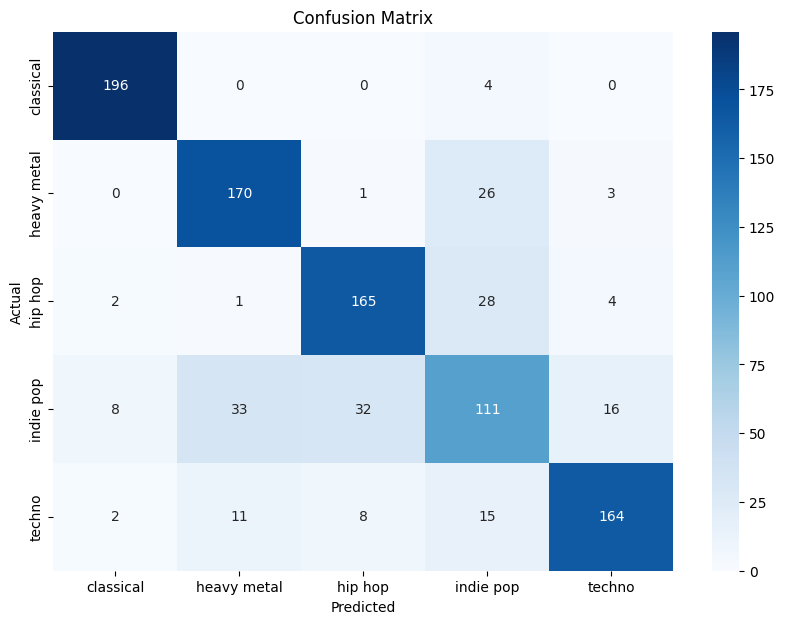

In [88]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
# Investigate misclassified instances
misclassified = X_test[y_test != y_pred].copy(deep=True)
misclassified['Actual'] = y_test[y_test != y_pred]
misclassified['Predicted'] = y_pred[y_test != y_pred]
misclassified = raw_data[['name', 'artist']].join(misclassified, how='inner')

In [91]:
misclassified

,name,artist,danceability,energy,valence,tempo,instrumentalness,liveness,speechiness,Actual,Predicted
40,Bubble Pop Electric,thquib,0.638,0.977,0.5380,96.973,0.04920,0.2220,0.1620,indie pop,hip hop
46,Gatsby,Current Joys,0.630,0.697,0.5640,172.029,0.06870,0.2440,0.1800,indie pop,hip hop
65,Intro to Zest Pop,Mustard Service,0.641,0.771,0.8570,119.952,0.94400,0.2550,0.0404,indie pop,techno
71,Banco Popular,Drug Church,0.436,0.928,0.5290,129.967,0.00000,0.4640,0.0833,indie pop,heavy metal
74,Broken Boy (feat. Iggy Pop),Cage The Elephant,0.492,0.939,0.4840,166.030,0.00210,0.1310,0.1180,indie pop,heavy metal
...,...,...,...,...,...,...,...,...,...,...,...
4875,Drill Instructor - Short Mix,Captain Jack,0.718,0.950,0.8780,150.045,0.00649,0.1890,0.0813,techno,indie pop
4876,The Question Is What Is the Question? - Live I...,Scooter,0.600,0.979,0.5890,142.033,0.02680,0.7200,0.0629,techno,heavy metal
4900,Ocean Rising,Fabrice Lig,0.397,0.773,0.4730,119.996,0.89800,0.0531,0.0421,techno,indie pop
4941,Too Far To Speak,19.85,0.318,1.000,0.0383,155.018,0.71700,0.3200,0.2090,techno,heavy metal
